In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/final_Project_bank_credit_scoring.csv')

df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [3]:
# Overview of each
df.info()

# Missing values check
# print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Задолженность              18420 non-null  float64
 1   Просрочка, дни             18420 non-null  int64  
 2   Первоначльный лимит        18420 non-null  float64
 3   BIRTHDATE                  18420 non-null  object 
 4   SEX                        18420 non-null  object 
 5   EDU                        18420 non-null  object 
 6   INCOME                     18420 non-null  float64
 7   TERM                       18420 non-null  int64  
 8   Рейтинг кредитной истории  17488 non-null  object 
 9   LV_AREA                    16297 non-null  object 
 10  LV_SETTLEMENTNAME          18374 non-null  object 
 11  INDUSTRYNAME               18420 non-null  object 
 12  PDN                        18420 non-null  float64
 13  CLIENTID                   18420 non-null  int

In [4]:
df.dtypes

Задолженность                float64
Просрочка, дни                 int64
Первоначльный лимит          float64
BIRTHDATE                     object
SEX                           object
EDU                           object
INCOME                       float64
TERM                           int64
Рейтинг кредитной истории     object
LV_AREA                       object
LV_SETTLEMENTNAME             object
INDUSTRYNAME                  object
PDN                          float64
CLIENTID                       int64
SCORINGMARK                  float64
UNDERAGECHILDRENCOUNT          int64
VELCOMSCORING                float64
FAMILYSTATUS                   int64
dtype: object

In [5]:
df.describe()

,Задолженность,"Просрочка, дни",Первоначльный лимит,INCOME,TERM,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
count,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,1.842000e+04,16786.000000,18420.000000,8889.000000,18420.000000
mean,4318.769750,9.196743,5127.834256,1664.840782,52.301737,0.290288,8.226245e+05,186.432622,0.636754,177.040162,1.498751
std,4336.432353,42.309092,4879.201691,1048.813447,13.378788,0.144359,1.966853e+05,67.430848,0.854167,310.624940,0.500988
min,0.000000,0.000000,180.000000,0.000000,23.000000,0.000000,1.289800e+04,-108.000000,0.000000,-2.000000,1.000000
25%,1287.900000,0.000000,1550.000000,1021.692500,36.000000,0.190000,7.193478e+05,134.000000,0.000000,-2.000000,1.000000
50%,2675.670000,0.000000,3200.000000,1460.175000,60.000000,0.300000,9.083645e+05,182.000000,0.000000,-2.000000,1.000000
75%,5785.870000,0.000000,6912.500000,1980.460000,60.000000,0.390000,9.621360e+05,234.000000,1.000000,278.000000,2.000000
max,40000.000000,491.000000,40000.000000,29942.820000,60.000000,1.210000,1.061453e+06,416.000000,3.000000,998.000000,4.000000


In [6]:
#drop NaN values in the dataset.

#df.dropna()
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [7]:
#display number of null values in the dataset.
print(df.isnull().sum())
print(df.isnull().sum()/df.shape[0])
display(df.head())

Задолженность                   0
Просрочка, дни                  0
Первоначльный лимит             0
BIRTHDATE                       0
SEX                             0
EDU                             0
INCOME                          0
TERM                            0
Рейтинг кредитной истории     932
LV_AREA                      2123
LV_SETTLEMENTNAME              46
INDUSTRYNAME                    0
PDN                             0
CLIENTID                        0
SCORINGMARK                  1634
UNDERAGECHILDRENCOUNT           0
VELCOMSCORING                9531
FAMILYSTATUS                    0
dtype: int64
Задолженность                0.000000
Просрочка, дни               0.000000
Первоначльный лимит          0.000000
BIRTHDATE                    0.000000
SEX                          0.000000
EDU                          0.000000
INCOME                       0.000000
TERM                         0.000000
Рейтинг кредитной истории    0.050597
LV_AREA                      0.11

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [8]:
#substitute NaN values with 0.0 in VELCOMSCORING, SCORINGMARK,
#substitute LIVING AREA with N/A

df['VELCOMSCORING'] = df['VELCOMSCORING'].fillna(0) 
df['SCORINGMARK'] = df['SCORINGMARK'].fillna(0) 
df['LV_AREA'] = df['LV_AREA'].fillna("N/A") 
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,0.0,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,N/A,МИНСК,Финансы и страхование,0.17,539353,0.0,1,0.0,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,0.0,0,0.0,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,0.0,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,N/A,Минск,Медицина и здравоохранение,0.63,425193,0.0,0,0.0,2


In [9]:
#translation of Education Levels from Russian to English

df['EDU'].unique()

edu_translation = {
    'Среднее': 'Secondary',
    'Высшее': 'Higher',
    'Неоконченное высшее': 'Incomplete Higher',
    'Послевузовское': 'Postgraduate',
    'Среднее специальное': 'Secondary special'
}

df['EDU'] = df['EDU'].map(edu_translation)

df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,0.0,1
1,3765.04,0,5000.0,1987-12-19,Женский,Higher,1693.68,60,B2,N/A,МИНСК,Финансы и страхование,0.17,539353,0.0,1,0.0,1
2,2067.66,0,2650.0,1966-02-28,Женский,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,0.0,0,0.0,2
3,2370.39,0,3000.0,1972-02-18,Женский,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,0.0,2
4,2280.55,0,3000.0,1997-02-23,Женский,Higher,1092.65,60,B3,N/A,Минск,Медицина и здравоохранение,0.63,425193,0.0,0,0.0,2


In [10]:
#translation of Industry Names from Russian to English

df['INDUSTRYNAME'].unique()

industry_translation = {

'АПК':'AIC',
'Финансы и страхование':'Finance and Insurance', 
'Медицина и здравоохранение':'Medicine and Healthcare',
'Государственное управление':'Public Administration', 
'Производство':'Production',
'Услуги населени':'Services to the Population',
'Строительство':'Construction', 
'Торговля':'Trade',
'Информационные технологии':'Information Technology',
'Транспорт/перевозки':'Transport/Transportation',
'Иное':'Other',
'Наука и образование':'Science and Education',
'Спорт и туризм':'Sports and Tourism',
'МВД/МЧС/МО':'MVD/MES/MO',
'Культура и искусство':'Culture and Art',
'Пенсионер':'Pensioner' }

df['INDUSTRYNAME'] = df['INDUSTRYNAME'].map(industry_translation)

df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,AIC,0.98,919517,233.0,0,0.0,1
1,3765.04,0,5000.0,1987-12-19,Женский,Higher,1693.68,60,B2,N/A,МИНСК,Finance and Insurance,0.17,539353,0.0,1,0.0,1
2,2067.66,0,2650.0,1966-02-28,Женский,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Medicine and Healthcare,0.40,818913,0.0,0,0.0,2
3,2370.39,0,3000.0,1972-02-18,Женский,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Public Administration,0.29,691598,216.0,0,0.0,2
4,2280.55,0,3000.0,1997-02-23,Женский,Higher,1092.65,60,B3,N/A,Минск,Medicine and Healthcare,0.63,425193,0.0,0,0.0,2


In [11]:
#Conversion of Birthdates to actual age and saving it in Age column

from datetime import datetime

df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], format='%Y-%m-%d', errors='coerce')

today = pd.to_datetime("today")

df['AGE'] = (today - df['BIRTHDATE']).dt.days //365

df = df.drop(columns=['BIRTHDATE'])

df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS,AGE
0,6063.50,3,7000.0,Мужской,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,AIC,0.98,919517,233.0,0,0.0,1,41
1,3765.04,0,5000.0,Женский,Higher,1693.68,60,B2,N/A,МИНСК,Finance and Insurance,0.17,539353,0.0,1,0.0,1,37
2,2067.66,0,2650.0,Женский,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Medicine and Healthcare,0.40,818913,0.0,0,0.0,2,59
3,2370.39,0,3000.0,Женский,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Public Administration,0.29,691598,216.0,0,0.0,2,53
4,2280.55,0,3000.0,Женский,Higher,1092.65,60,B3,N/A,Минск,Medicine and Healthcare,0.63,425193,0.0,0,0.0,2,28


In [12]:
#Renaming column names from Russian to English

df.rename(columns={'Задолженность': 'Debt'}, inplace=True)
df.rename(columns={'Просрочка, дни': 'Overdue Days '}, inplace=True)
df.rename(columns={'Первоначльный лимит': 'Initial Limit'}, inplace=True)
df.rename(columns={'Рейтинг кредитной истории': 'Credit History Rating'}, inplace=True)
df.head()

,Debt,Overdue Days,Initial Limit,SEX,EDU,INCOME,TERM,Credit History Rating,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS,AGE
0,6063.50,3,7000.0,Мужской,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,AIC,0.98,919517,233.0,0,0.0,1,41
1,3765.04,0,5000.0,Женский,Higher,1693.68,60,B2,N/A,МИНСК,Finance and Insurance,0.17,539353,0.0,1,0.0,1,37
2,2067.66,0,2650.0,Женский,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Medicine and Healthcare,0.40,818913,0.0,0,0.0,2,59
3,2370.39,0,3000.0,Женский,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Public Administration,0.29,691598,216.0,0,0.0,2,53
4,2280.55,0,3000.0,Женский,Higher,1092.65,60,B3,N/A,Минск,Medicine and Healthcare,0.63,425193,0.0,0,0.0,2,28


In [13]:
#translation of SEX from Russian to English

df['SEX'] = df['SEX'].replace('Мужской', 'MALE')
df['SEX'] = df['SEX'].replace('Женский', 'FEMALE')

#replace FAMILYSTATUS from 1,2,3 & 4 to SINGLE, MARRIED, DIVORCED and SINGLE PARENTS, respectively.

df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(1, 'SINGLE')
df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(2, 'MARRIED')
df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(3, 'DIVORCED')
df['FAMILYSTATUS'] = df['FAMILYSTATUS'].replace(4, 'SINGLE_PARENT')

df.head()

,Debt,Overdue Days,Initial Limit,SEX,EDU,INCOME,TERM,Credit History Rating,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS,AGE
0,6063.50,3,7000.0,MALE,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,AIC,0.98,919517,233.0,0,0.0,SINGLE,41
1,3765.04,0,5000.0,FEMALE,Higher,1693.68,60,B2,N/A,МИНСК,Finance and Insurance,0.17,539353,0.0,1,0.0,SINGLE,37
2,2067.66,0,2650.0,FEMALE,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Medicine and Healthcare,0.40,818913,0.0,0,0.0,MARRIED,59
3,2370.39,0,3000.0,FEMALE,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Public Administration,0.29,691598,216.0,0,0.0,MARRIED,53
4,2280.55,0,3000.0,FEMALE,Higher,1092.65,60,B3,N/A,Минск,Medicine and Healthcare,0.63,425193,0.0,0,0.0,MARRIED,28


In [14]:
# mean_age = df["clnt_age"].mean()
most_gender = df["SEX"].mode()[0]
most_credit_ranking = df["Credit History Rating"].mode()[0]
AVG_Debt = df["Debt"].mean()
MAX_Debt = df["Debt"].max()
MIN_Debt = df["Debt"].min()
AVG_Limit = df["Initial Limit"].mean()
MAX_Limit = df["Initial Limit"].max()
MIN_Limit = df["Initial Limit"].min()

AVG_INCOME = df["INCOME"].mean()
MAX_INCOME = df["INCOME"].max()
MIN_INCOME = df["INCOME"].min()

AVG_PDN = df["PDN"].mean()
MAX_PDN = df["PDN"].max()
MIN_PDN = df["PDN"].min()

AVG_SCORINGMARK	 = df["SCORINGMARK"].mean()
MAX_SCORINGMARK	 = df["SCORINGMARK"].max()
MIN_SCORINGMARK	 = df["SCORINGMARK"].min()

AVG_AGE	 = df["AGE"].mean()
MAX_AGE	 = df["AGE"].max()
MIN_AGE	 = df["AGE"].min()

print(f"AVG_AGE: {AVG_AGE:.2f}")
print("MAX_AGE:",MAX_AGE)
print("MIN_AGE:",MIN_AGE)

print(f"AVG_SCORINGMARK: {AVG_SCORINGMARK:.2f}")
print("MAX_SCORINGMARK:",MAX_SCORINGMARK)
print("MIN_SCORINGMARK:",MIN_SCORINGMARK)

print(f"AVG_INCOME: {AVG_INCOME: .2f}")
print("MAX_INCOME:",MAX_INCOME)
print("MIN_INCOME:",MIN_INCOME)

print(f"AVG_PDN: {AVG_PDN: .2f}")
print("MAX_PDN:",MAX_PDN)
print("MIN_PDN:",MIN_PDN)

print(f"AVG_Debt: {AVG_Debt: .2f}")
print("MAX_Debt:",MAX_Debt)
print("MIN_Debt:",MIN_Debt)

print(f"AVG_Initial Limit: {AVG_Limit: .2f}")
print("MAX_Initial Limit:",MAX_Limit)
print("MIN_Initial Limit:",MIN_Limit)

print("most fredquent gender:", most_gender)
print("most credit ranked:", most_credit_ranking)

AVG_AGE: 37.07
MAX_AGE: 69
MIN_AGE: 20
AVG_SCORINGMARK: 169.89
MAX_SCORINGMARK: 416.0
MIN_SCORINGMARK: -108.0
AVG_INCOME:  1664.84
MAX_INCOME: 29942.82
MIN_INCOME: 0.0
AVG_PDN:  0.29
MAX_PDN: 1.21
MIN_PDN: 0.0
AVG_Debt:  4318.77
MAX_Debt: 40000.0
MIN_Debt: 0.0
AVG_Initial Limit:  5127.83
MAX_Initial Limit: 40000.0
MIN_Initial Limit: 180.0
most fredquent gender: MALE
most credit ranked: B3


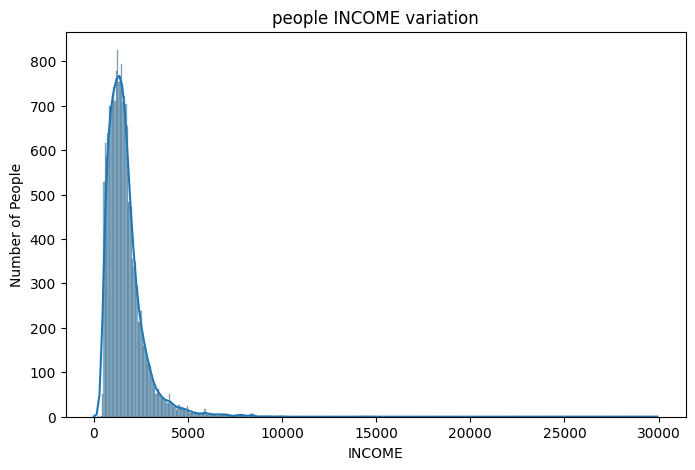

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['INCOME'], kde=True)
plt.title('people INCOME variation')
plt.xlabel('INCOME')
plt.ylabel('Number of People')
plt.show()

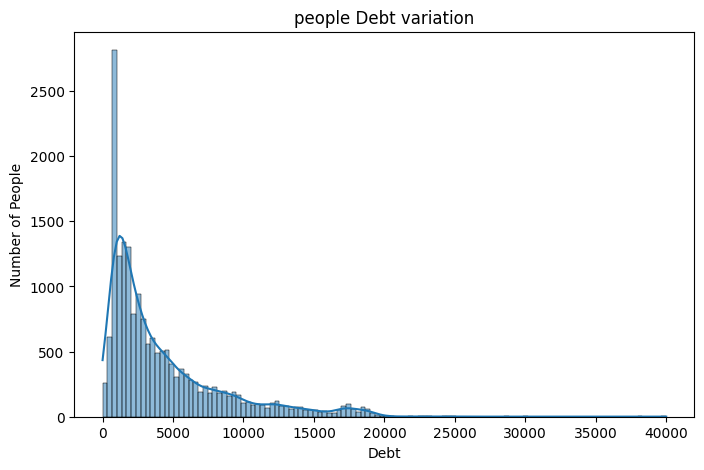

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Debt'],  kde=True)
plt.title('people Debt variation')
plt.xlabel('Debt')
plt.ylabel('Number of People')
plt.show()

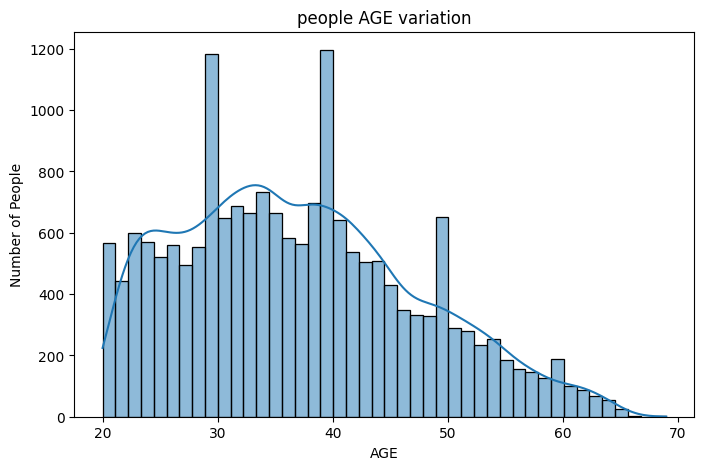

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AGE'], kde=True)
plt.title('people AGE variation')
plt.xlabel('AGE')
plt.ylabel('Number of People')
plt.show()

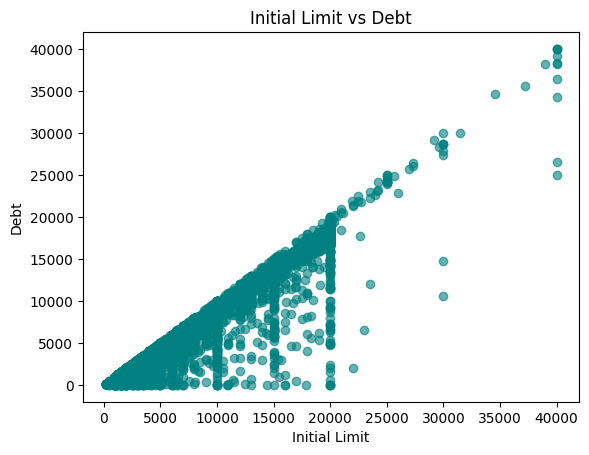

In [18]:
plt.scatter(df['Initial Limit'], df['Debt'], alpha=0.6, color='teal')
plt.xlabel('Initial Limit')
plt.ylabel('Debt')
plt.title('Initial Limit vs Debt')
plt.show()

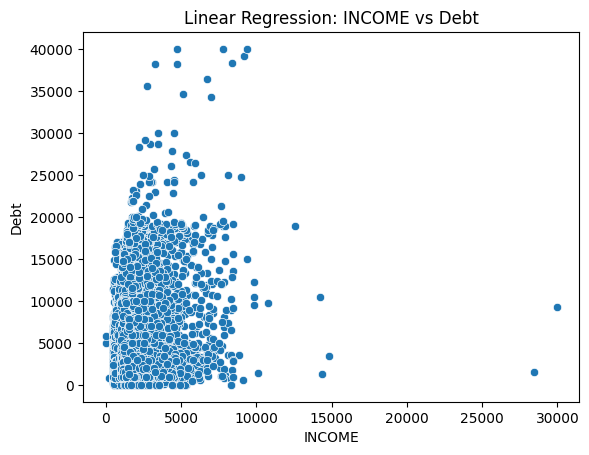

In [19]:
sns.scatterplot(x='INCOME', y='Debt', data=df)
plt.title('Linear Regression: INCOME vs Debt')
plt.xlabel('INCOME')
plt.ylabel('Debt')
plt.show()

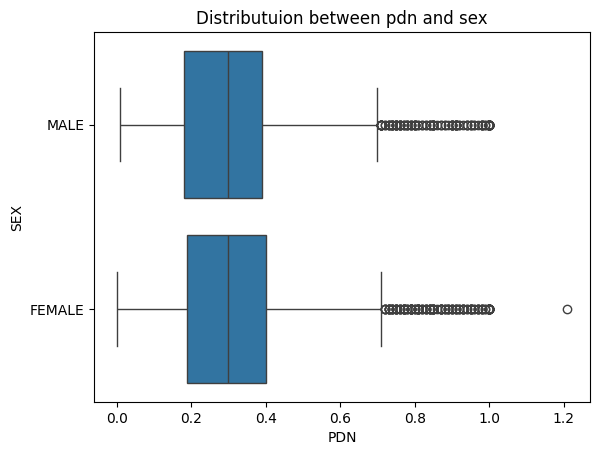

In [20]:
sns.boxplot(x='PDN', y='SEX', data=df)
plt.title('Distributuion between pdn and sex')
plt.show()

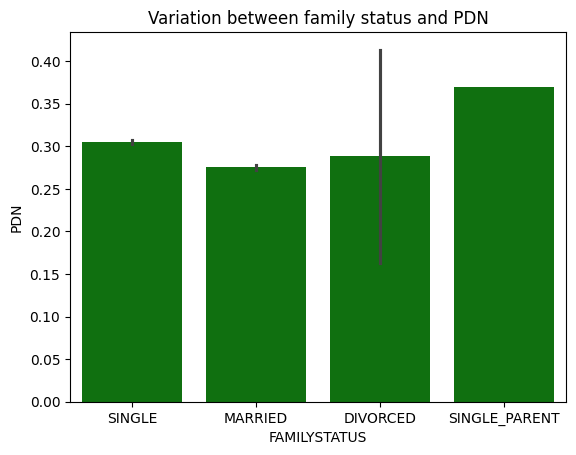

In [21]:
sns.barplot(y='PDN', x='FAMILYSTATUS', data=df, color="green")
plt.title('Variation between family status and PDN')
plt.show()

In [22]:
#P-value greater than 0.05 means that the average FAMILY STATUS and PDN are not related

# ANOVA test
# H0: mean_single = mean_married = mean_divorced = mean_sgile_parent.

from scipy.stats import f_oneway

# Group PDN by Family Status
grouped_data = [group['PDN'].values for name, group in df.groupby('FAMILYSTATUS')]

# Run ANOVA
f_stat, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 65.38694259976889
P-value: 4.760331618840639e-42


In [23]:
df['Credit History Rating'].value_counts(dropna=False, normalize=True)

Credit History Rating
B3     0.116938
C1     0.112921
C2     0.109229
C3     0.108903
B2     0.092345
D1     0.075299
B1     0.072476
D2     0.057546
A3     0.054072
NaN    0.050597
D3     0.047177
A1     0.042182
A2     0.034745
E1     0.010858
E3     0.007818
E2     0.006678
-1     0.000217
Name: proportion, dtype: float64

In [24]:
df[df['Credit History Rating'].isna() == False]


,Debt,Overdue Days,Initial Limit,SEX,EDU,INCOME,TERM,Credit History Rating,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS,AGE
0,6063.50,3,7000.0,MALE,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,AIC,0.98,919517,233.0,0,0.0,SINGLE,41
1,3765.04,0,5000.0,FEMALE,Higher,1693.68,60,B2,N/A,МИНСК,Finance and Insurance,0.17,539353,0.0,1,0.0,SINGLE,37
2,2067.66,0,2650.0,FEMALE,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Medicine and Healthcare,0.40,818913,0.0,0,0.0,MARRIED,59
3,2370.39,0,3000.0,FEMALE,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Public Administration,0.29,691598,216.0,0,0.0,MARRIED,53
4,2280.55,0,3000.0,FEMALE,Higher,1092.65,60,B3,N/A,Минск,Medicine and Healthcare,0.63,425193,0.0,0,0.0,MARRIED,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18414,0.00,0,1000.0,MALE,Higher,2320.43,24,D1,г. Минск,МИНСК,MVD/MES/MO,0.22,952708,116.0,2,-2.0,SINGLE,28
18415,0.00,0,10850.0,MALE,Higher,3563.75,60,B1,г. Минск,МИНСК,Information Technology,0.40,687867,344.0,0,-2.0,SINGLE,25
18417,0.00,0,3500.0,MALE,Secondary special,3363.05,24,C2,Минская область,Солигорск,Construction,0.19,1060373,129.0,0,-2.0,MARRIED,22
18418,0.00,0,10000.0,MALE,Secondary,1670.13,60,C1,г. Минск,МИНСК,Trade,0.28,1056128,179.0,0,-2.0,MARRIED,21


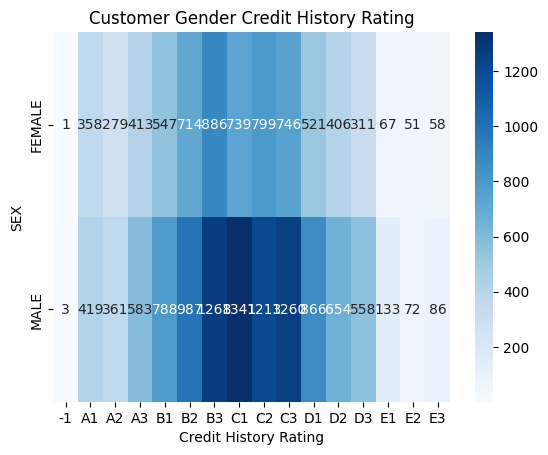

In [25]:
# Example using crosstab
cross_tab = pd.crosstab(df['SEX'], df['Credit History Rating'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Gender Credit History Rating')
plt.show()

In [26]:
# Do a Chi2 test to check if "Credit History Rating" and "Sex" are related

from scipy.stats import chi2_contingency

# H0: both columns are independent or not related
# Create a contingency table (cross-tab)
contingency_table = pd.crosstab(df['Credit History Rating'], df['SEX'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi2 Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_val)

# Both columns are related

Chi2 Statistic: 57.80473643561065
Degrees of Freedom: 15
P-value: 5.989434009698385e-07


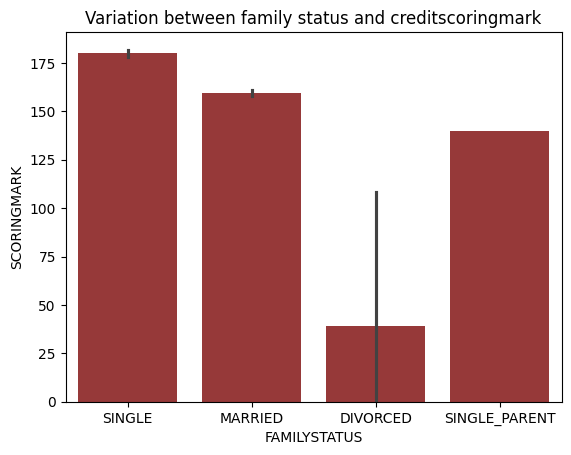

In [27]:
sns.barplot(y='SCORINGMARK', x='FAMILYSTATUS', data=df, color="brown")
plt.title('Variation between family status and creditscoringmark')
plt.show()

In [28]:
# Do an ANOVA test

#P-value greater than 0.05 means that the average FAMILY STATUS and SCORING MARK are not related

# ANOVA test
# H0: mean_single = mean_married = mean_divorced = mean_sgile_parent.

from scipy.stats import f_oneway

# Group PDN by Family Status
grouped_data = [group['SCORINGMARK'].values for name, group in df.groupby('FAMILYSTATUS')]

# Run ANOVA
f_stat, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 97.85105985285027
P-value: 7.803442070220489e-63


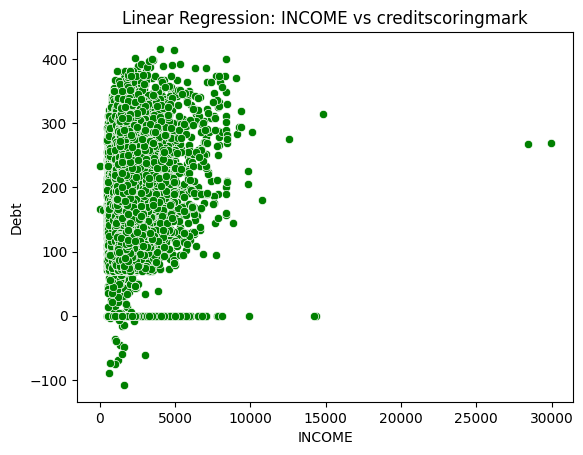

In [29]:
sns.scatterplot(x='INCOME', y='SCORINGMARK', data=df, color='green')
plt.title('Linear Regression: INCOME vs creditscoringmark')
plt.xlabel('INCOME')
plt.ylabel('Debt')
plt.show()

In [30]:
df.head()

,Debt,Overdue Days,Initial Limit,SEX,EDU,INCOME,TERM,Credit History Rating,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS,AGE
0,6063.50,3,7000.0,MALE,Secondary special,703.07,60,A1,Гомельская область,КОСАКОВКА,AIC,0.98,919517,233.0,0,0.0,SINGLE,41
1,3765.04,0,5000.0,FEMALE,Higher,1693.68,60,B2,N/A,МИНСК,Finance and Insurance,0.17,539353,0.0,1,0.0,SINGLE,37
2,2067.66,0,2650.0,FEMALE,Secondary,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Medicine and Healthcare,0.40,818913,0.0,0,0.0,MARRIED,59
3,2370.39,0,3000.0,FEMALE,Secondary special,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Public Administration,0.29,691598,216.0,0,0.0,MARRIED,53
4,2280.55,0,3000.0,FEMALE,Higher,1092.65,60,B3,N/A,Минск,Medicine and Healthcare,0.63,425193,0.0,0,0.0,MARRIED,28


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder

X = df[['INCOME', 'AGE','Initial Limit','Debt','FAMILYSTATUS','SEX']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

categorical_unique_values = [df[col].unique().tolist() for col in X_train_cat]
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_cat_trans_np = ohe.transform(X_train_cat).toarray()
X_test_cat_trans_np = ohe.transform(X_test_cat).toarray()

X_train_cat_trans_df = pd.DataFrame(X_train_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_trans_df = pd.DataFrame(X_test_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

# Scalers , OneHotEncoder 
# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_trans_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_trans_df], axis=1)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Mean Squared Error: 0.019807747985496258
R² Score: 0.08275904814274027
Predicted_Value: [0.23056684 0.25760312 0.27622954 ... 0.24504991 0.35136009 0.32748206]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


X = df[['INCOME', 'AGE','Initial Limit','Debt','FAMILYSTATUS','SEX']]
y = df['SCORINGMARK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

categorical_unique_values = [df[col].unique().tolist() for col in X_train_cat]
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_cat_trans_np = ohe.transform(X_train_cat).toarray()
X_test_cat_trans_np = ohe.transform(X_test_cat).toarray()

X_train_cat_trans_df = pd.DataFrame(X_train_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_trans_df = pd.DataFrame(X_test_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

# Scalers , OneHotEncoder 
# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_trans_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_trans_df], axis=1)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

Mean Squared Error: 6520.754511309383
R² Score: 0.0867614361460538
Predicted_Value: [183.08257397 176.69929804 167.63751093 ... 140.31984473 201.30078335
 148.55553033]


Mean Squared Error: 0.021531786285686708
R² Score: 0.002923696205560211
Predicted_Value: [0.27469793 0.28806526 0.28767592 ... 0.29883699 0.28962262 0.28222517]


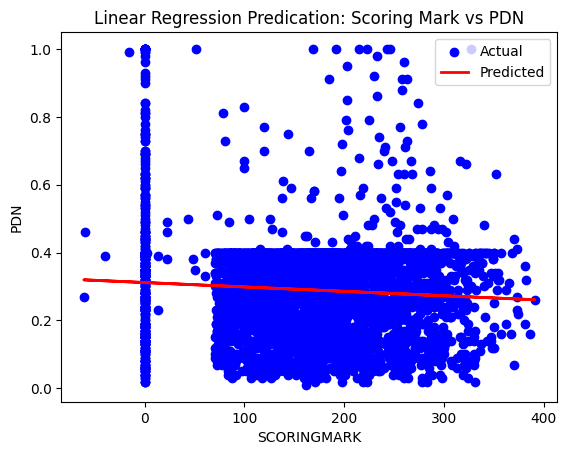

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X = df[['SCORINGMARK']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('SCORINGMARK')
plt.ylabel('PDN')
plt.title('Linear Regression Predication: Scoring Mark vs PDN')
plt.legend()
plt.show()

Mean Squared Error: 0.021310958378317243
R² Score: 0.013149613866695997
Predicted_Value: [0.29362847 0.27619128 0.27484995 ... 0.27216731 0.29228715 0.30972435]


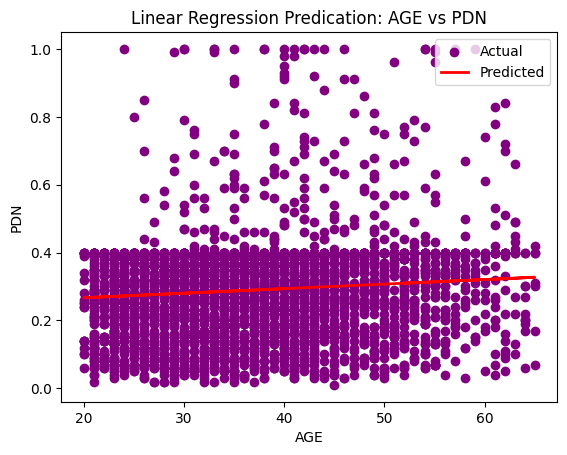

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X = df[['AGE']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

plt.scatter(X_test, y_test, color='purple', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('AGE')
plt.ylabel('PDN')
plt.title('Linear Regression Predication: AGE vs PDN')
plt.legend()
plt.show()

Mean Squared Error: 0.021563574641572315
R² Score: 0.0014516670868617298
Predicted_Value: [0.27911079 0.28693397 0.28571448 ... 0.29094925 0.28885282 0.3029254 ]


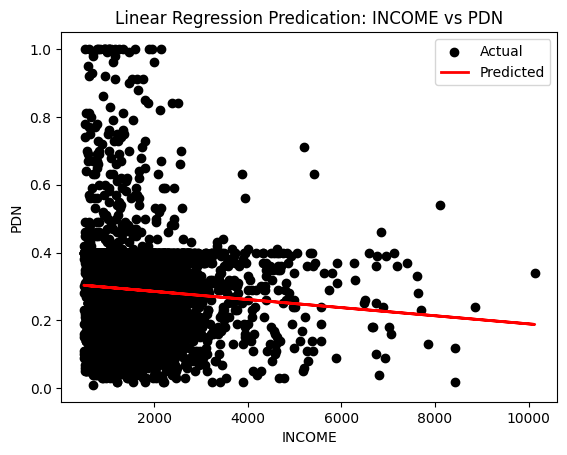

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X = df[['INCOME']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('INCOME')
plt.ylabel('PDN')
plt.title('Linear Regression Predication: INCOME vs PDN')
plt.legend()
plt.show()

In [35]:
from sklearn.ensemble import AdaBoostRegressor

X = df[['INCOME', 'AGE','Initial Limit','Debt','FAMILYSTATUS','SEX']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

categorical_unique_values = [df[col].unique().tolist() for col in X_train_cat]
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_cat_trans_np = ohe.transform(X_train_cat).toarray()
X_test_cat_trans_np = ohe.transform(X_test_cat).toarray()

X_train_cat_trans_df = pd.DataFrame(X_train_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_trans_df = pd.DataFrame(X_test_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

# Scalers , OneHotEncoder 
# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_trans_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_trans_df], axis=1)

# Fit Linear Regression Model
model = AdaBoostRegressor()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)
 

Mean Squared Error: 0.020866998072051123
R² Score: 0.033708163692983906
Predicted_Value: [0.2640329  0.25526752 0.25526752 ... 0.25176858 0.40226016 0.47881453]


In [36]:
from sklearn.ensemble import BaggingRegressor

X = df[['INCOME', 'AGE','Initial Limit','Debt','FAMILYSTATUS','SEX']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

categorical_unique_values = [df[col].unique().tolist() for col in X_train_cat]
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_cat_trans_np = ohe.transform(X_train_cat).toarray()
X_test_cat_trans_np = ohe.transform(X_test_cat).toarray()

X_train_cat_trans_df = pd.DataFrame(X_train_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_trans_df = pd.DataFrame(X_test_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

# Scalers , OneHotEncoder 
# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_trans_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_trans_df], axis=1)

# Fit Linear Regression Model
model = BaggingRegressor()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)


Mean Squared Error: 0.020840815593234578
R² Score: 0.034920600453046347
Predicted_Value: [0.267 0.157 0.32  ... 0.182 0.319 0.547]


In [37]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['INCOME', 'AGE','Initial Limit','Debt','FAMILYSTATUS','SEX']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

categorical_unique_values = [df[col].unique().tolist() for col in X_train_cat]
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_cat_trans_np = ohe.transform(X_train_cat).toarray()
X_test_cat_trans_np = ohe.transform(X_test_cat).toarray()

X_train_cat_trans_df = pd.DataFrame(X_train_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_trans_df = pd.DataFrame(X_test_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

# Scalers , OneHotEncoder 
# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_trans_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_trans_df], axis=1)

# Fit Linear Regression Model
model = KNeighborsRegressor()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)


Mean Squared Error: 0.021313626492942456
R² Score: 0.013026061002418654
Predicted_Value: [0.236 0.376 0.184 ... 0.252 0.26  0.378]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df[['INCOME', 'AGE','Initial Limit','Debt','FAMILYSTATUS','SEX']]
y = df['PDN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

categorical_unique_values = [df[col].unique().tolist() for col in X_train_cat]
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_cat_trans_np = ohe.transform(X_train_cat).toarray()
X_test_cat_trans_np = ohe.transform(X_test_cat).toarray()

X_train_cat_trans_df = pd.DataFrame(X_train_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_trans_df = pd.DataFrame(X_test_cat_trans_np, columns=ohe.get_feature_names_out(), index=X_test_cat.index)

# Scalers , OneHotEncoder 
# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat_trans_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_trans_df], axis=1)

# Fit Linear Regression Model
model = RandomForestRegressor()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Predicted_Value:", y_pred)


This experiment is to predict the probability of customers' payment default (PDN) according to our dataset.
I started the analysis by importing and cleaning the dataset. After describing and translating the data from Russian to English, I proceeded with the statistical analysis to gain significant insight into the the dataset, afterwhich, I went into the machine learning analysis, using models like RandomForestRegressor, KNeighborsRegressor, BaggingRegressor, AdaBoostRegressor and LinearRegression imported from sklearn for prediction. 

According to my experiment, I arrived at the conclusion that the best model for the prediction is LinearRegresion model because it has the least mean square error and also runs faster than the other models.
